In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
import os
os.environ['OMP_NUM_THREADS'] = '1' 

In [63]:
dataset = pd.read_csv('online_shoppers_intention.csv')

In [65]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [67]:
from sklearn import preprocessing 
enc = preprocessing.OrdinalEncoder()

In [69]:
dataset['Month'] = enc.fit_transform(dataset['Month'].values.reshape(-1,1))
dataset['VisitorType'] = enc.fit_transform(dataset['VisitorType'].values.reshape(-1,1))
dataset['Weekend'] = enc.fit_transform(dataset['Weekend'].values.reshape(-1,1))
dataset['Revenue'] = enc.fit_transform(dataset['Revenue'].values.reshape(-1,1))

In [71]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,2.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,2.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,2.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,2.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,2.0,1.0,0.0


In [73]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

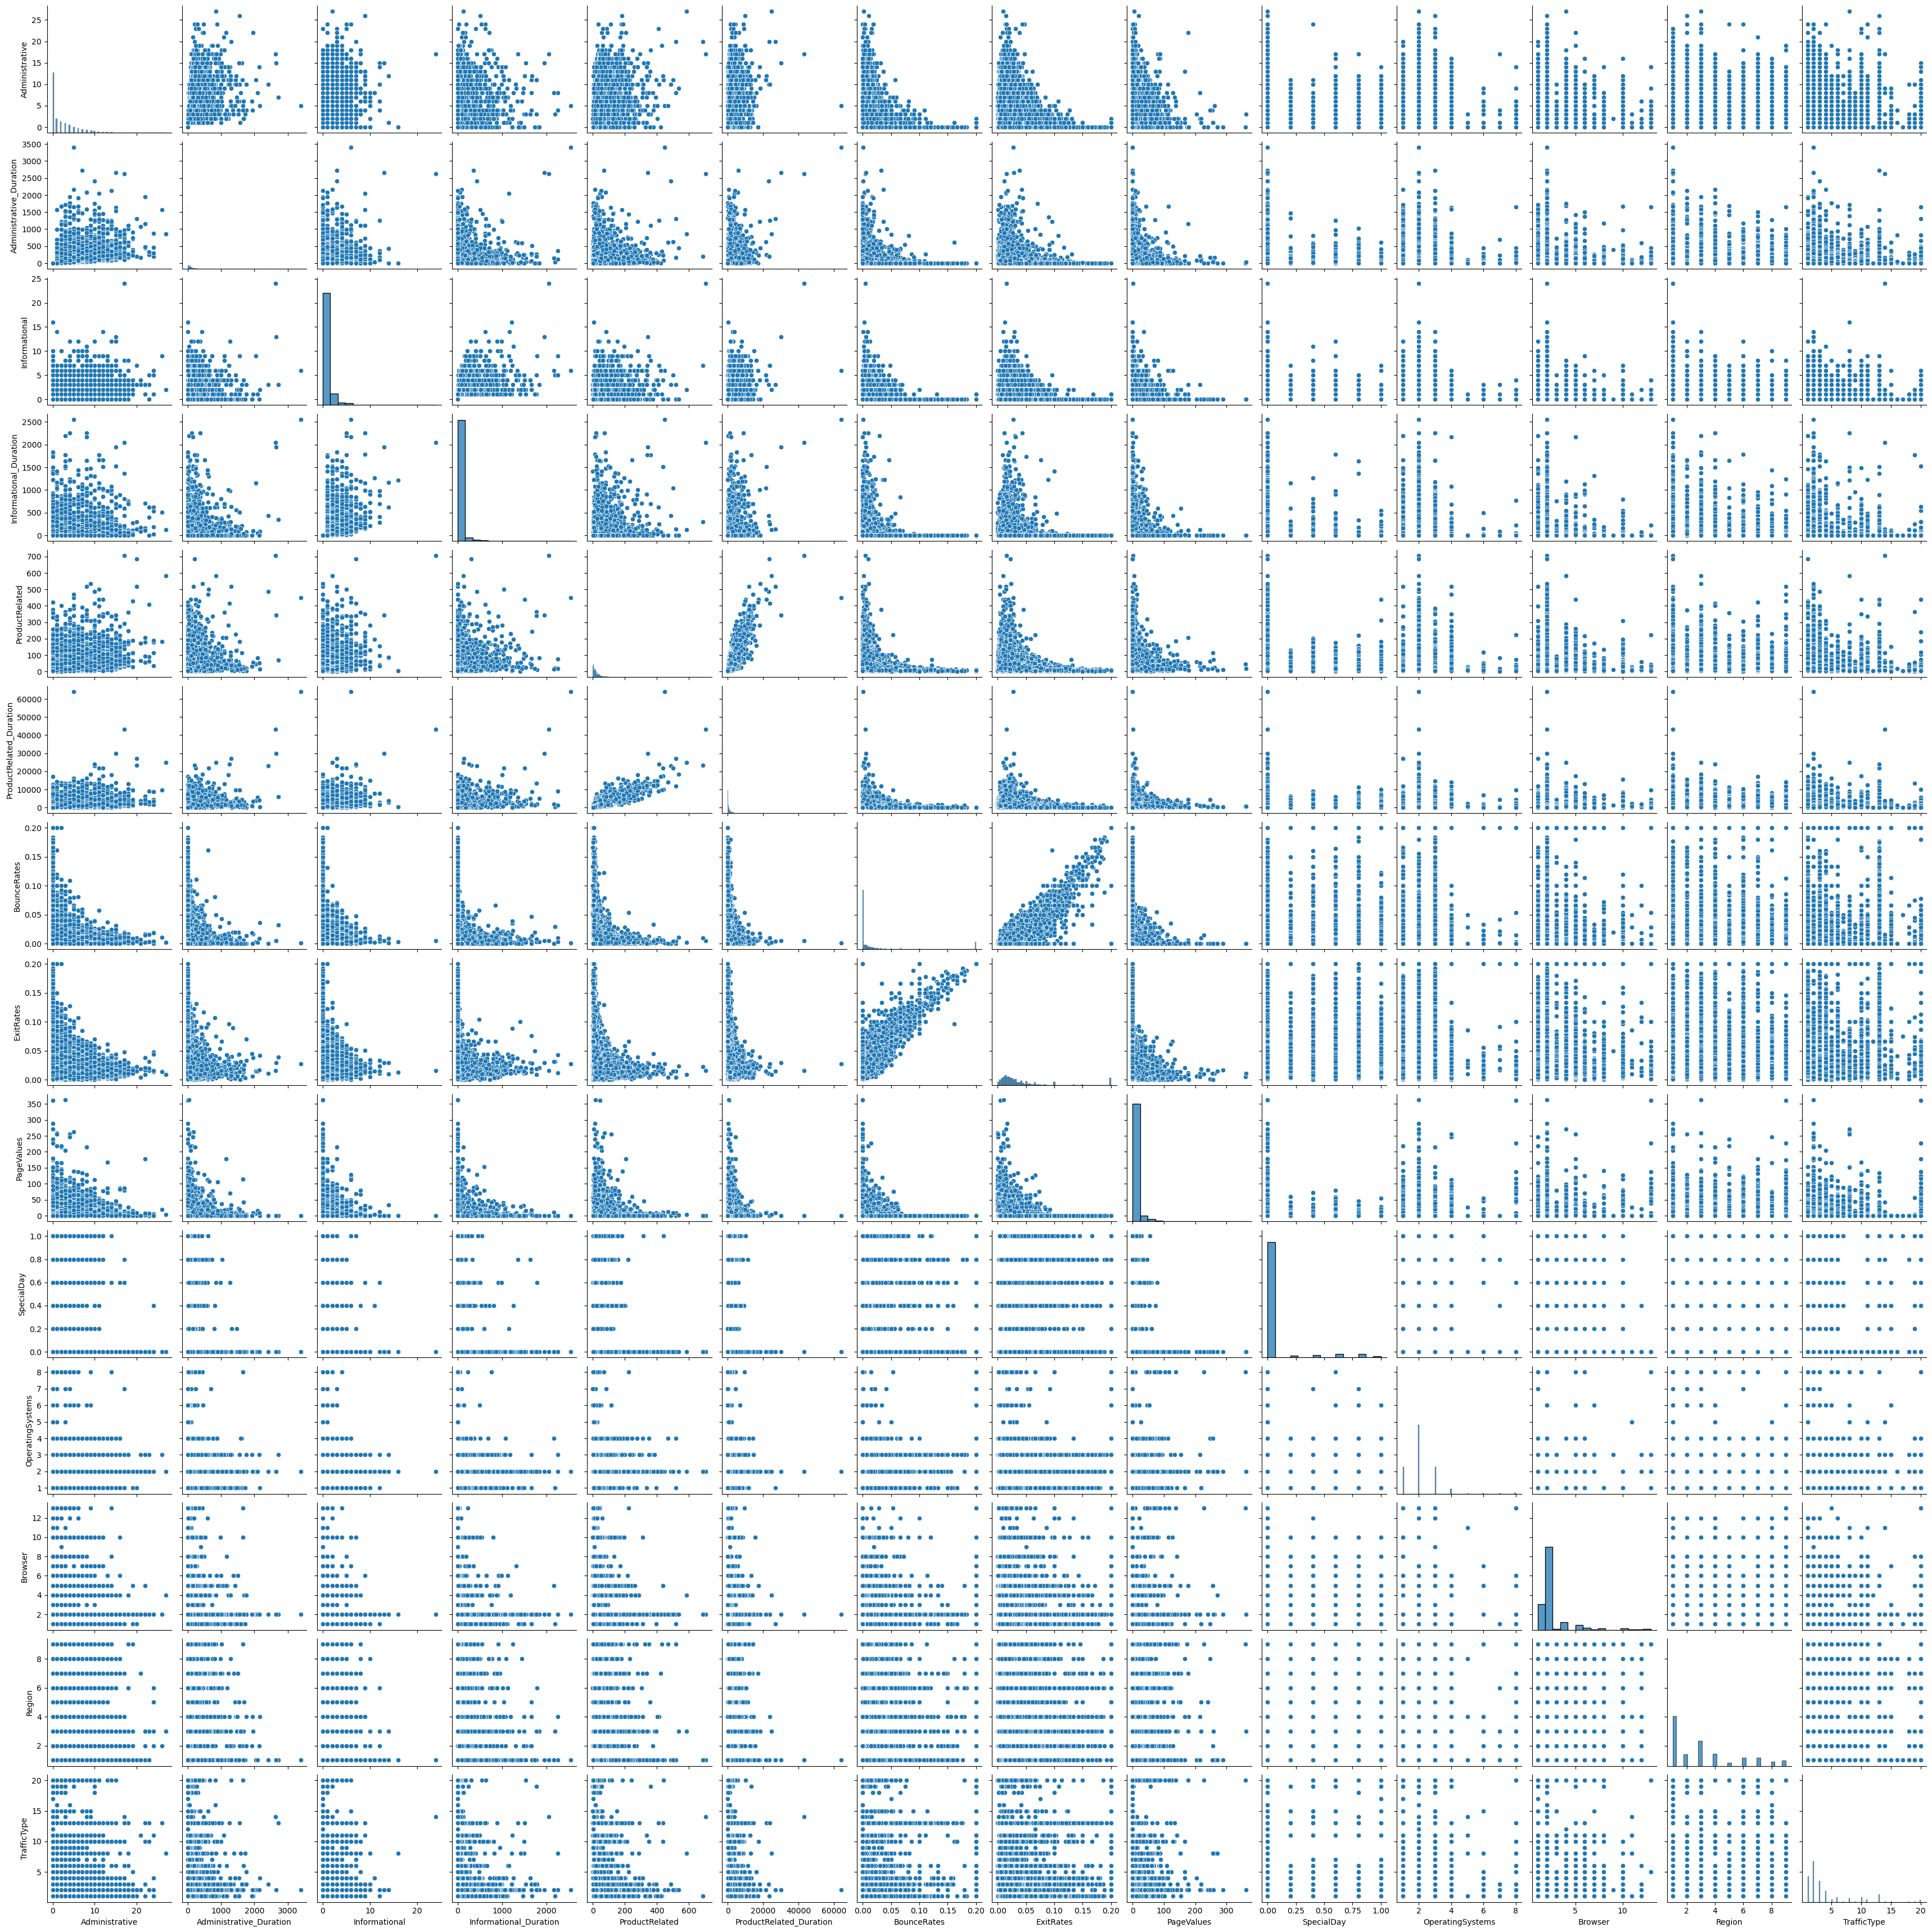

In [9]:
sns.pairplot(X)

In [75]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

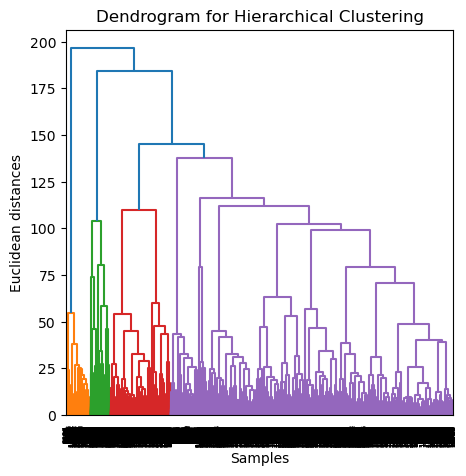

In [93]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


plt.figure(figsize=(5, 5))

# Createing the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Add title and labels
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [95]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean' ,linkage='ward')  # Remove the affinity parameter

# Fit and predict the clusters
y_hc = hc.fit_predict(X)  

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.20093057, 0.1057217 ])

In [98]:
sum(pca.explained_variance_ratio_)

0.30665227380222565

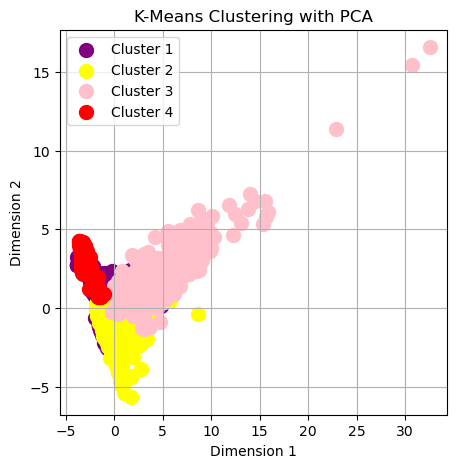

In [101]:
import matplotlib.pyplot as plt

# Colors for the clusters

colors = ['purple', 'yellow', 'pink', 'red']  # Extend colors if you have more clusters

plt.figure(figsize=(5, 5))

# Plotting the clusters

for i in range(4):  # Change range(4) to the number of clusters you have
    plt.scatter(X_reduced[y_hc == i, 0], X_reduced[y_hc == i, 1], 
                s=100, c=colors[i], label='Cluster ' + str(i + 1))

plt.title('K-Means Clustering with PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid()
plt.show()